Kaggle Challenge: "We are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge."

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('Data/ts_train.csv')
test = pd.read_csv('Data/ts_test.csv')
items = pd.read_csv('Data/ts_items.csv')

In [3]:
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [4]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
items.shape

(22170, 3)

In [7]:
train.shape

(2935849, 6)

In [8]:
test.shape

(214200, 3)

In [9]:
both = pd.merge(train, test, on=['item_id', 'shop_id'], how='inner')

In [10]:
both.shape

(1224439, 7)

In [11]:
both.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID
0,02.01.2013,0,59,22154,999.0,1.0,150983
1,03.01.2013,0,25,2574,399.0,2.0,56520
2,05.01.2013,0,25,2574,399.0,1.0,56520
3,07.01.2013,0,25,2574,399.0,1.0,56520
4,08.01.2013,0,25,2574,399.0,2.0,56520


In [12]:
shops = pd.read_csv('Data/ts_shops.csv')

In [13]:
shops.shape

(60, 2)

In [14]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [15]:
shop_names_df = pd.merge(both, shops, on=['shop_id'], how='right')

In [16]:
shop_names_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,shop_name
0,NaN,NaN,0,NaN,NaN,NaN,NaN,"!Якутск Орджоникидзе, 56 фран"
1,NaN,NaN,1,NaN,NaN,NaN,NaN,"!Якутск ТЦ ""Центральный"" фран"
2,16.01.2013,0.0,2,11391.0,899.0,1.0,22595.0,"Адыгея ТЦ ""Мега"""
3,16.02.2013,1.0,2,11391.0,899.0,1.0,22595.0,"Адыгея ТЦ ""Мега"""
4,13.02.2013,1.0,2,11391.0,899.0,1.0,22595.0,"Адыгея ТЦ ""Мега"""


In [17]:
shop_names_df.shape

(1224457, 8)

In [18]:
shop_names_df.isnull().sum()

date              18
date_block_num    18
shop_id            0
item_id           18
item_price        18
item_cnt_day      18
ID                18
shop_name          0
dtype: int64

In [19]:
shop_names_df = shop_names_df.dropna()

In [20]:
shop_names_df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
ID                0
shop_name         0
dtype: int64

In [21]:
shop_names_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,shop_name
2,16.01.2013,0.0,2,11391.0,899.0,1.0,22595.0,"Адыгея ТЦ ""Мега"""
3,16.02.2013,1.0,2,11391.0,899.0,1.0,22595.0,"Адыгея ТЦ ""Мега"""
4,13.02.2013,1.0,2,11391.0,899.0,1.0,22595.0,"Адыгея ТЦ ""Мега"""
5,11.03.2013,2.0,2,11391.0,675.0,1.0,22595.0,"Адыгея ТЦ ""Мега"""
6,01.05.2013,4.0,2,11391.0,899.0,1.0,22595.0,"Адыгея ТЦ ""Мега"""


In [22]:
df = shop_names_df.copy()

In [23]:
# Converting date to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# Setting 'date' column as  index
df.set_index('date', inplace=True)

# Sorting df by the 'date' index
df.sort_index(inplace=True)

# Aggregating data based on daily total sales
daily_total_sales = df.groupby(pd.Grouper(freq='D')).agg({
    'item_cnt_day': 'sum'
})

In [24]:
import matplotlib.pyplot as plt

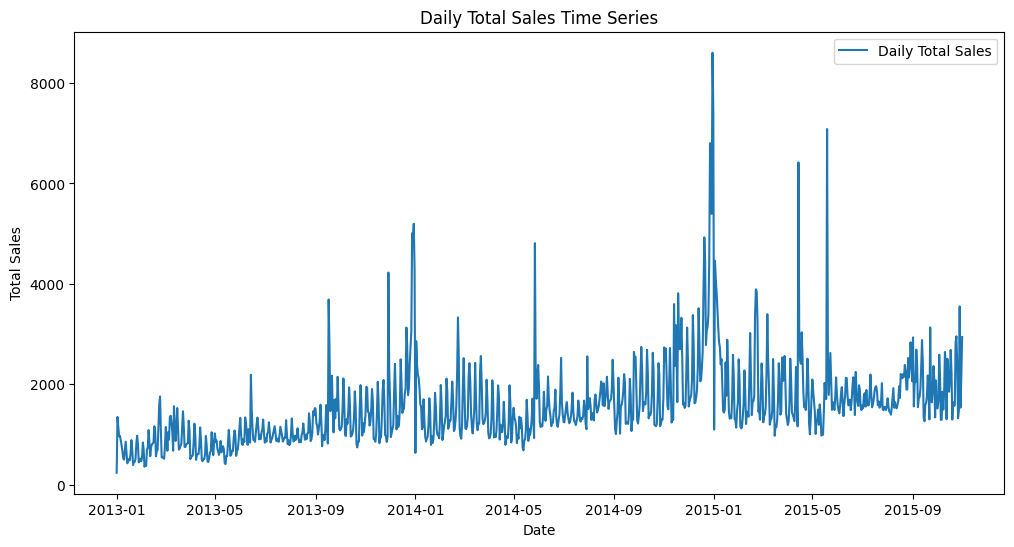

In [25]:
# Plotting daily total sales time series
plt.figure(figsize=(12, 6))
plt.plot(daily_total_sales.index, daily_total_sales['item_cnt_day'], label='Daily Total Sales')
plt.title('Daily Total Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

In [26]:
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,shop_name
date,,,,,,,
2013-01-01,0.0,19,22088.0,79.0,2.0,97488.0,"Курск ТЦ ""Пушкинский"""
2013-01-01,0.0,15,10329.0,1199.0,1.0,78134.0,"Калуга ТРЦ ""XXI век"""
2013-01-01,0.0,15,10159.0,199.0,1.0,78936.0,"Калуга ТРЦ ""XXI век"""
2013-01-01,0.0,2,1905.0,249.0,1.0,21691.0,"Адыгея ТЦ ""Мега"""
2013-01-01,0.0,37,22087.0,79.0,2.0,168887.0,"Новосибирск ТЦ ""Мега"""


In [27]:
df.columns

Index(['date_block_num', 'shop_id', 'item_id', 'item_price', 'item_cnt_day',
       'ID', 'shop_name'],
      dtype='object')

In [28]:
# Creating a lag feature for 'item_cnt_day' to capture historical sales patterns

for i in range(1, 4):  # Create lag features for the last 3 months
    df[f'item_cnt_day_lag_{i}'] = df['item_cnt_day'].shift(i)

In [29]:
# Creating rolling mean and std for 'item_cnt_day' to capture trends
df['rolling_mean'] = df['item_cnt_day'].rolling(window=3).mean()
df['rolling_std'] = df['item_cnt_day'].rolling(window=3).std()

In [31]:
df['shop_id'].unique()

array([19, 15,  2, 37, 14, 18, 42, 28, 46,  7, 41, 38, 45, 16,  6, 25,  4,
       35, 50, 52, 31, 26, 22, 44, 59, 24, 53, 47, 56,  3, 10, 21, 12,  5,
       57, 58, 55, 49, 39, 48, 34, 36])

In [32]:
# Calculating the average price for each item and shop to capture more trends
df['avg_item_price'] = df.groupby('item_id')['item_price'].transform('mean')
df['avg_shop_price'] = df.groupby('shop_id')['item_price'].transform('mean')

In [33]:
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,ID,shop_name,item_cnt_day_lag_1,item_cnt_day_lag_2,item_cnt_day_lag_3,rolling_mean,rolling_std,avg_item_price,avg_shop_price
date,,,,,,,,,,,,,,
2013-01-01,0.0,19,22088.0,79.0,2.0,97488.0,"Курск ТЦ ""Пушкинский""",NaN,NaN,NaN,NaN,NaN,93.964499,967.338175
2013-01-01,0.0,15,10329.0,1199.0,1.0,78134.0,"Калуга ТРЦ ""XXI век""",2.0,NaN,NaN,NaN,NaN,1093.444444,1079.421295
2013-01-01,0.0,15,10159.0,199.0,1.0,78936.0,"Калуга ТРЦ ""XXI век""",1.0,2.0,NaN,1.333333,0.57735,200.926517,1079.421295
2013-01-01,0.0,2,1905.0,249.0,1.0,21691.0,"Адыгея ТЦ ""Мега""",1.0,1.0,2.0,1.000000,0.00000,247.662574,1415.520849
2013-01-01,0.0,37,22087.0,79.0,2.0,168887.0,"Новосибирск ТЦ ""Мега""",1.0,1.0,1.0,1.333333,0.57735,90.921365,1062.201318


In [34]:
df.isnull().sum()

date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
ID                    0
shop_name             0
item_cnt_day_lag_1    1
item_cnt_day_lag_2    2
item_cnt_day_lag_3    3
rolling_mean          2
rolling_std           2
avg_item_price        0
avg_shop_price        0
dtype: int64

In [35]:
df = df.dropna()

In [36]:
df = df.drop('ID', axis=1)

In [37]:
df.head()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_cnt_day_lag_1,item_cnt_day_lag_2,item_cnt_day_lag_3,rolling_mean,rolling_std,avg_item_price,avg_shop_price
date,,,,,,,,,,,,,
2013-01-01,0.0,2,1905.0,249.0,1.0,"Адыгея ТЦ ""Мега""",1.0,1.0,2.0,1.000000,0.00000,247.662574,1415.520849
2013-01-01,0.0,37,22087.0,79.0,2.0,"Новосибирск ТЦ ""Мега""",1.0,1.0,1.0,1.333333,0.57735,90.921365,1062.201318
2013-01-01,0.0,14,5581.0,699.0,1.0,"Казань ТЦ ""ПаркХаус"" II",2.0,1.0,1.0,1.333333,0.57735,502.772642,1115.757120
2013-01-01,0.0,37,2308.0,799.0,2.0,"Новосибирск ТЦ ""Мега""",1.0,2.0,1.0,1.666667,0.57735,411.752222,1062.201318
2013-01-01,0.0,18,19119.0,299.0,1.0,"Красноярск ТЦ ""Июнь""",2.0,1.0,2.0,1.333333,0.57735,271.582766,1247.967010


In [39]:
df['item_id'].nunique()

4716

In [40]:
df['shop_id'].nunique()

42

In [41]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, concatenate

2024-01-15 21:58:55.279796: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [47]:
from tensorflow.keras.layers import Input, Embedding, Flatten, concatenate

# Frequency Encoding
item_freq = df['item_id'].value_counts(normalize=True)
shop_freq = df['shop_id'].value_counts(normalize=True)

df['item_freq_encoded'] = df['item_id'].map(item_freq)
df['shop_freq_encoded'] = df['shop_id'].map(shop_freq)

# Embeddings
num_unique_items = 4716
num_unique_shops = 42
embedding_dim = 16  # Adjust based on experimentation
sequence_length = 30

df['item_freq_encoded'] = df['item_id'].map(item_freq)
df['shop_freq_encoded'] = df['shop_id'].map(shop_freq)

# Input layers for item_id and shop_id
input_item = Input(shape=(sequence_length,))
input_shop = Input(shape=(sequence_length,))

# Embedding layers for item_id and shop_id
item_embedding_layer = Embedding(input_dim=num_unique_items, output_dim=embedding_dim, input_length=sequence_length)(input_item)
shop_embedding_layer = Embedding(input_dim=num_unique_shops, output_dim=embedding_dim, input_length=sequence_length)(input_shop)

# Flatten the embeddings
item_flatten = Flatten()(item_embedding_layer)
shop_flatten = Flatten()(shop_embedding_layer)

# Concatenate the flattened embeddings
merged_embeddings = concatenate([item_flatten, shop_flatten])


In [53]:
# Sum 'item_cnt_day' over a month to get the monthly amount
monthly_target = df.groupby(['shop_id', 'item_id'])['item_cnt_day'].sum().reset_index()

# Merge the encoded features with the monthly target
monthly_data = pd.merge(monthly_target, df[['item_id', 'shop_id', 'item_freq_encoded', 'shop_freq_encoded']], on=['item_id', 'shop_id'], how='left')

In [54]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(monthly_data[['item_freq_encoded', 'shop_freq_encoded']].values, monthly_data['item_cnt_day'].values, test_size=0.2, random_state=42)

In [62]:
print(X_train.shape, X_test.shape)

(979548, 2) (244888, 2)


In [63]:
print(y_train.shape, y_test.shape)

(979548,) (244888,)


In [64]:
monthly_data.shape

(1224436, 5)